<h1>Description and analysis of data</h1>

The dataset Household Power Consumption is a multivariate time series dataset that describes the electricity consumption for a single household over four years. The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.

Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.globalactivepower: household global minute-averaged active power (in kilowatt)

4.globalreactivepower: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

<h1>01: Load data</h1>
The dataset can be downloaded from the UCI Machine Learning repository as a single 20 megabyte .zip file: household_power_consumption.zip Download the dataset and unzip it into your current working directory. You will now have the file “household_power_consumption.txt” that is about 127 megabytes in size and contains all of the observations.
Note :  chantge the extension of file to household_power_consumption.csv

We can use the read_csv() function to load the data and combine the first two columns into a single date-time column that we can use as an index.

In [16]:
df = pd.read_csv("../data/household_power_consumption.csv",sep=';', header=0)
df.head()

C:\Users\imade\AppData\Local\Temp\ipykernel_5708\1637771499.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/household_power_consumption.csv",sep=';', header=0)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [17]:
# Combiner les colonnes Date et Time en une nouvelle colonne 'datetime'
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Définir 'datetime' comme index, si nécessaire
df.set_index('datetime', inplace=True)

# Afficher les premières lignes
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


<h1>02: Observation of electricity consumption over time:</h1>
The best way to understand a multivariate time series (data) is to draw line graphs. We can start by creating a separate one for each of the seven variables for four years from January 2007 to January 2011. The complete example is listed below:

In [36]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')



df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')




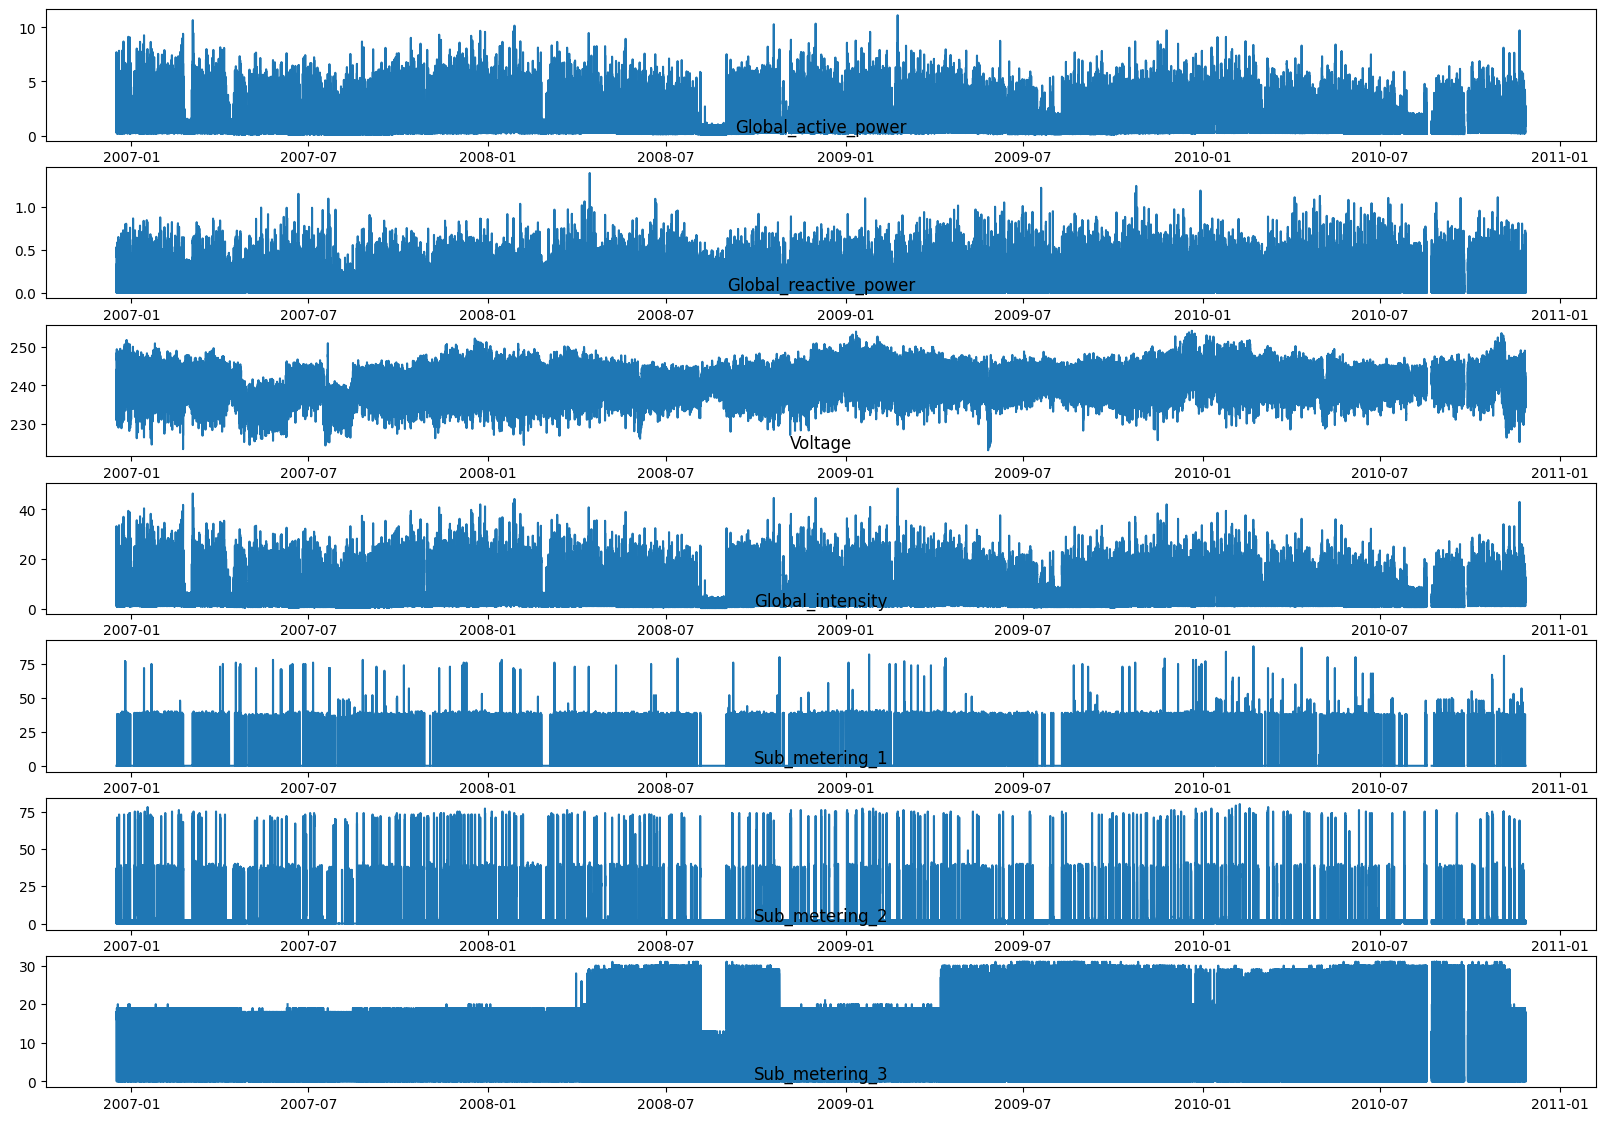

In [37]:
from matplotlib import pyplot

# Set the figure size
pyplot.figure(figsize=(20, 14))

# Loop starting from the 3rd column and excluding the last column
for i in range(2, len(df.columns)-1):  # Stop before the last column
    # Adjust the number of subplots to match the number of columns to plot
    pyplot.subplot(len(df.columns)-3, 1, i-1)  # Adjust the number of subplots
    name = df.columns[i] 
    pyplot.plot(df[name])  
    pyplot.title(name, y=0)  


pyplot.show()


These graphs showing the energy metrics of a particular location in a household show different values, between evolution and degradation, of electricity consumption. Let's analyze as a first case the results obtained by the sub metering 1 in the kitchen: this place, which has various household appliances, has as its main function the preparation of food and preparation of food and dishes. This invariable function is synonymous with saying that the that we need and will need are always the same, which means that the electricity that the values of electricity consumed remain in an analogous level. Let's move on to another example, that of the measurements of the "sub metering 3" for air conditioning systems that we can explain in 4 main phases: [2007-07, 2008-07]: From the summer of 2007 to the summer of 2008, the electricity consumption is too low because it is not yet low since no air conditioning system has been installed yet. [2008-07, 2009-01]: The consumption has evolved at this stage since they have installed a new system. new system. [2009-01, 2010-01]: In winter, we fall again in the degradation of these values again because of not moving in the air conditioning system (a boiler as an illustration). illustration). [2010-01, 2010-07]: New devices have been installed involving the increase of energy consumption in the of energy consumption in the household.

<h1>03: Annual visualization for the variable total active power</h1>
In this section, we will discuss the variable "Total Active Power". We will start with the annual visualization, we will draw a graph for each year, and then we will present some observations that can be deduced from it, the figure below shows the graphs obtained. shows the graphs obtained.

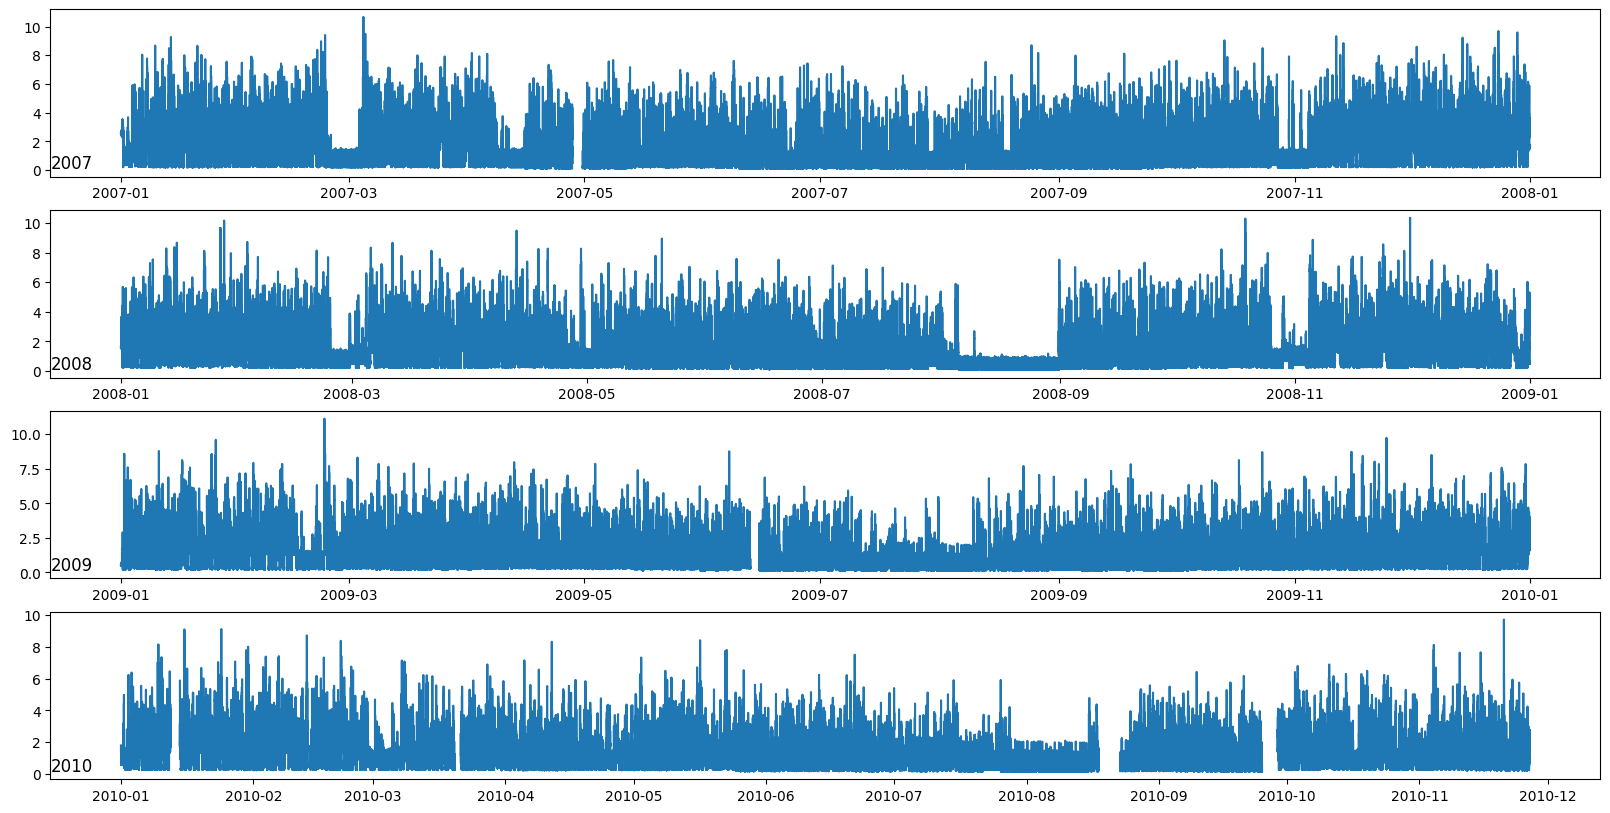

In [41]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Dataset
dataset = df

# Years you want to plot
years = [2007, 2008, 2009, 2010]

# Create the plot figure
pyplot.figure(figsize=(20, 10))

for i in range(len(years)):
    # Prepare subplot
    ax = pyplot.subplot(len(years), 1, i + 1)
    
    # Get all observations for the year
    year = years[i]
    result = dataset[dataset['Year'] == year]
    
    # Plot the active power for the year
    pyplot.plot(result['Global_active_power'])
    
    # Add a title to the subplot
    pyplot.title(str(year), y=0, loc='left')

# Display the plot
pyplot.show()


We can start by looking at the similarities over the four-year period, and the graphs are quite similar. For example, we noticed that the consumption during the winter months winter months was very high compared to the other months, furthermore, we noticed that consumption that the consumption decreased during the summer months (August) of 2008, 2009 and 2010, which is which is logical because most people go on vacation during these months, and unlike in 2007 year 2007, the consumption in August is normal, which means that they are still at home. home. We can notice a decrease in consumption at the end of February and beginning of March in 2007 and 2008, which may be related to the other matched individuals who were not followed up, as can be seen in Fig. can be seen in Figure.

<h1>04: Monthly visualization for the variable total active power</h1>
In this part, we will draw graphs of the monthly consumption of the year 2008 the figure below shows the graphs obtained:



C:\Users\imade\AppData\Local\Temp\ipykernel_5708\4259246491.py:29: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  month_name = pd.to_datetime(f'{month}-01', format='%m-%d').strftime('%B')


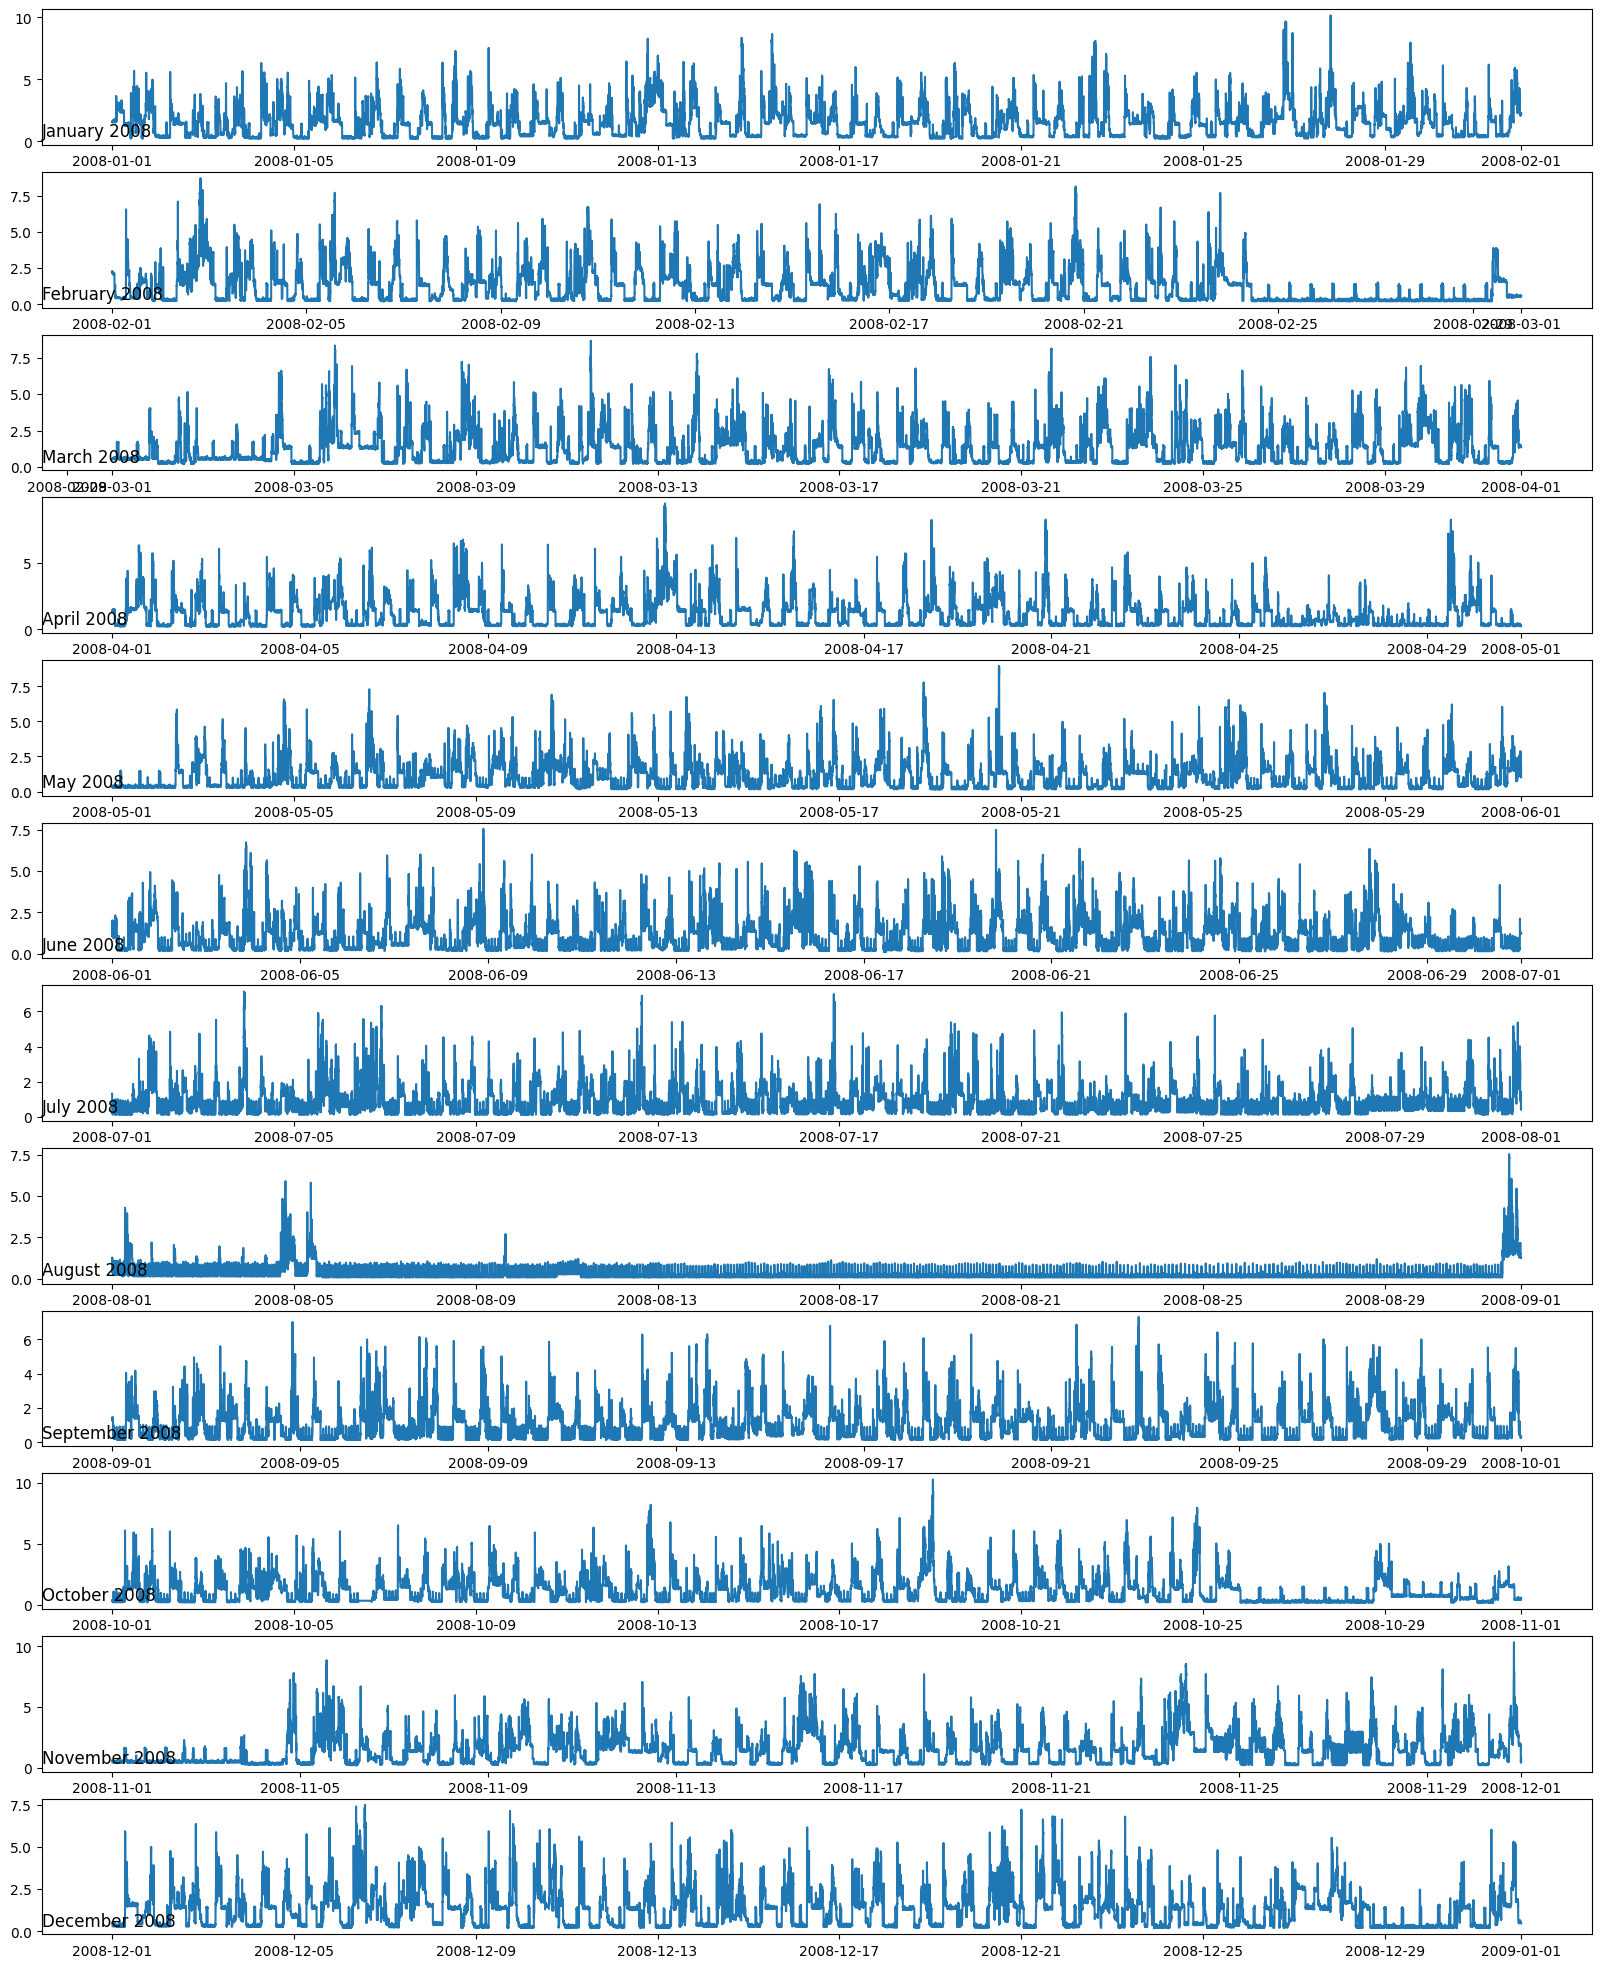

In [43]:

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Dataset
dataset = df

# Define the year and months to plot
year = 2008
months = [x for x in range(1, 13)]

# Create the plot figure
pyplot.figure(figsize=(20, 25))

for i in range(len(months)):
    # Prepare subplot
    ax = pyplot.subplot(len(months), 1, i + 1)
    
    # Get all observations for the year and month
    month = months[i]
    result = dataset[(dataset['Year'] == year) & (dataset['Month'] == month)]
    
    # Plot the active power for the month
    pyplot.plot(result['Global_active_power'])
    
    # Add a title to the subplot
    month_name = pd.to_datetime(f'{month}-01', format='%m-%d').strftime('%B')
    pyplot.title(f'{month_name} {year}', y=0, loc='left')

# Display the plot
pyplot.show()


We can notice a decrease in consumption in August, which confirms our opinion that that it was the vacation period, and we notice a direct increase in consumption at the end of at the end of the month.

<h1>05: Daily visualization for the variable total active power</h1>
Let's now focus on the daily analysis. In this part, we will plot graphs of daily electricity consumption, starting in January for 16 days in 2008, as shown days in 2008, as shown in the figure below:

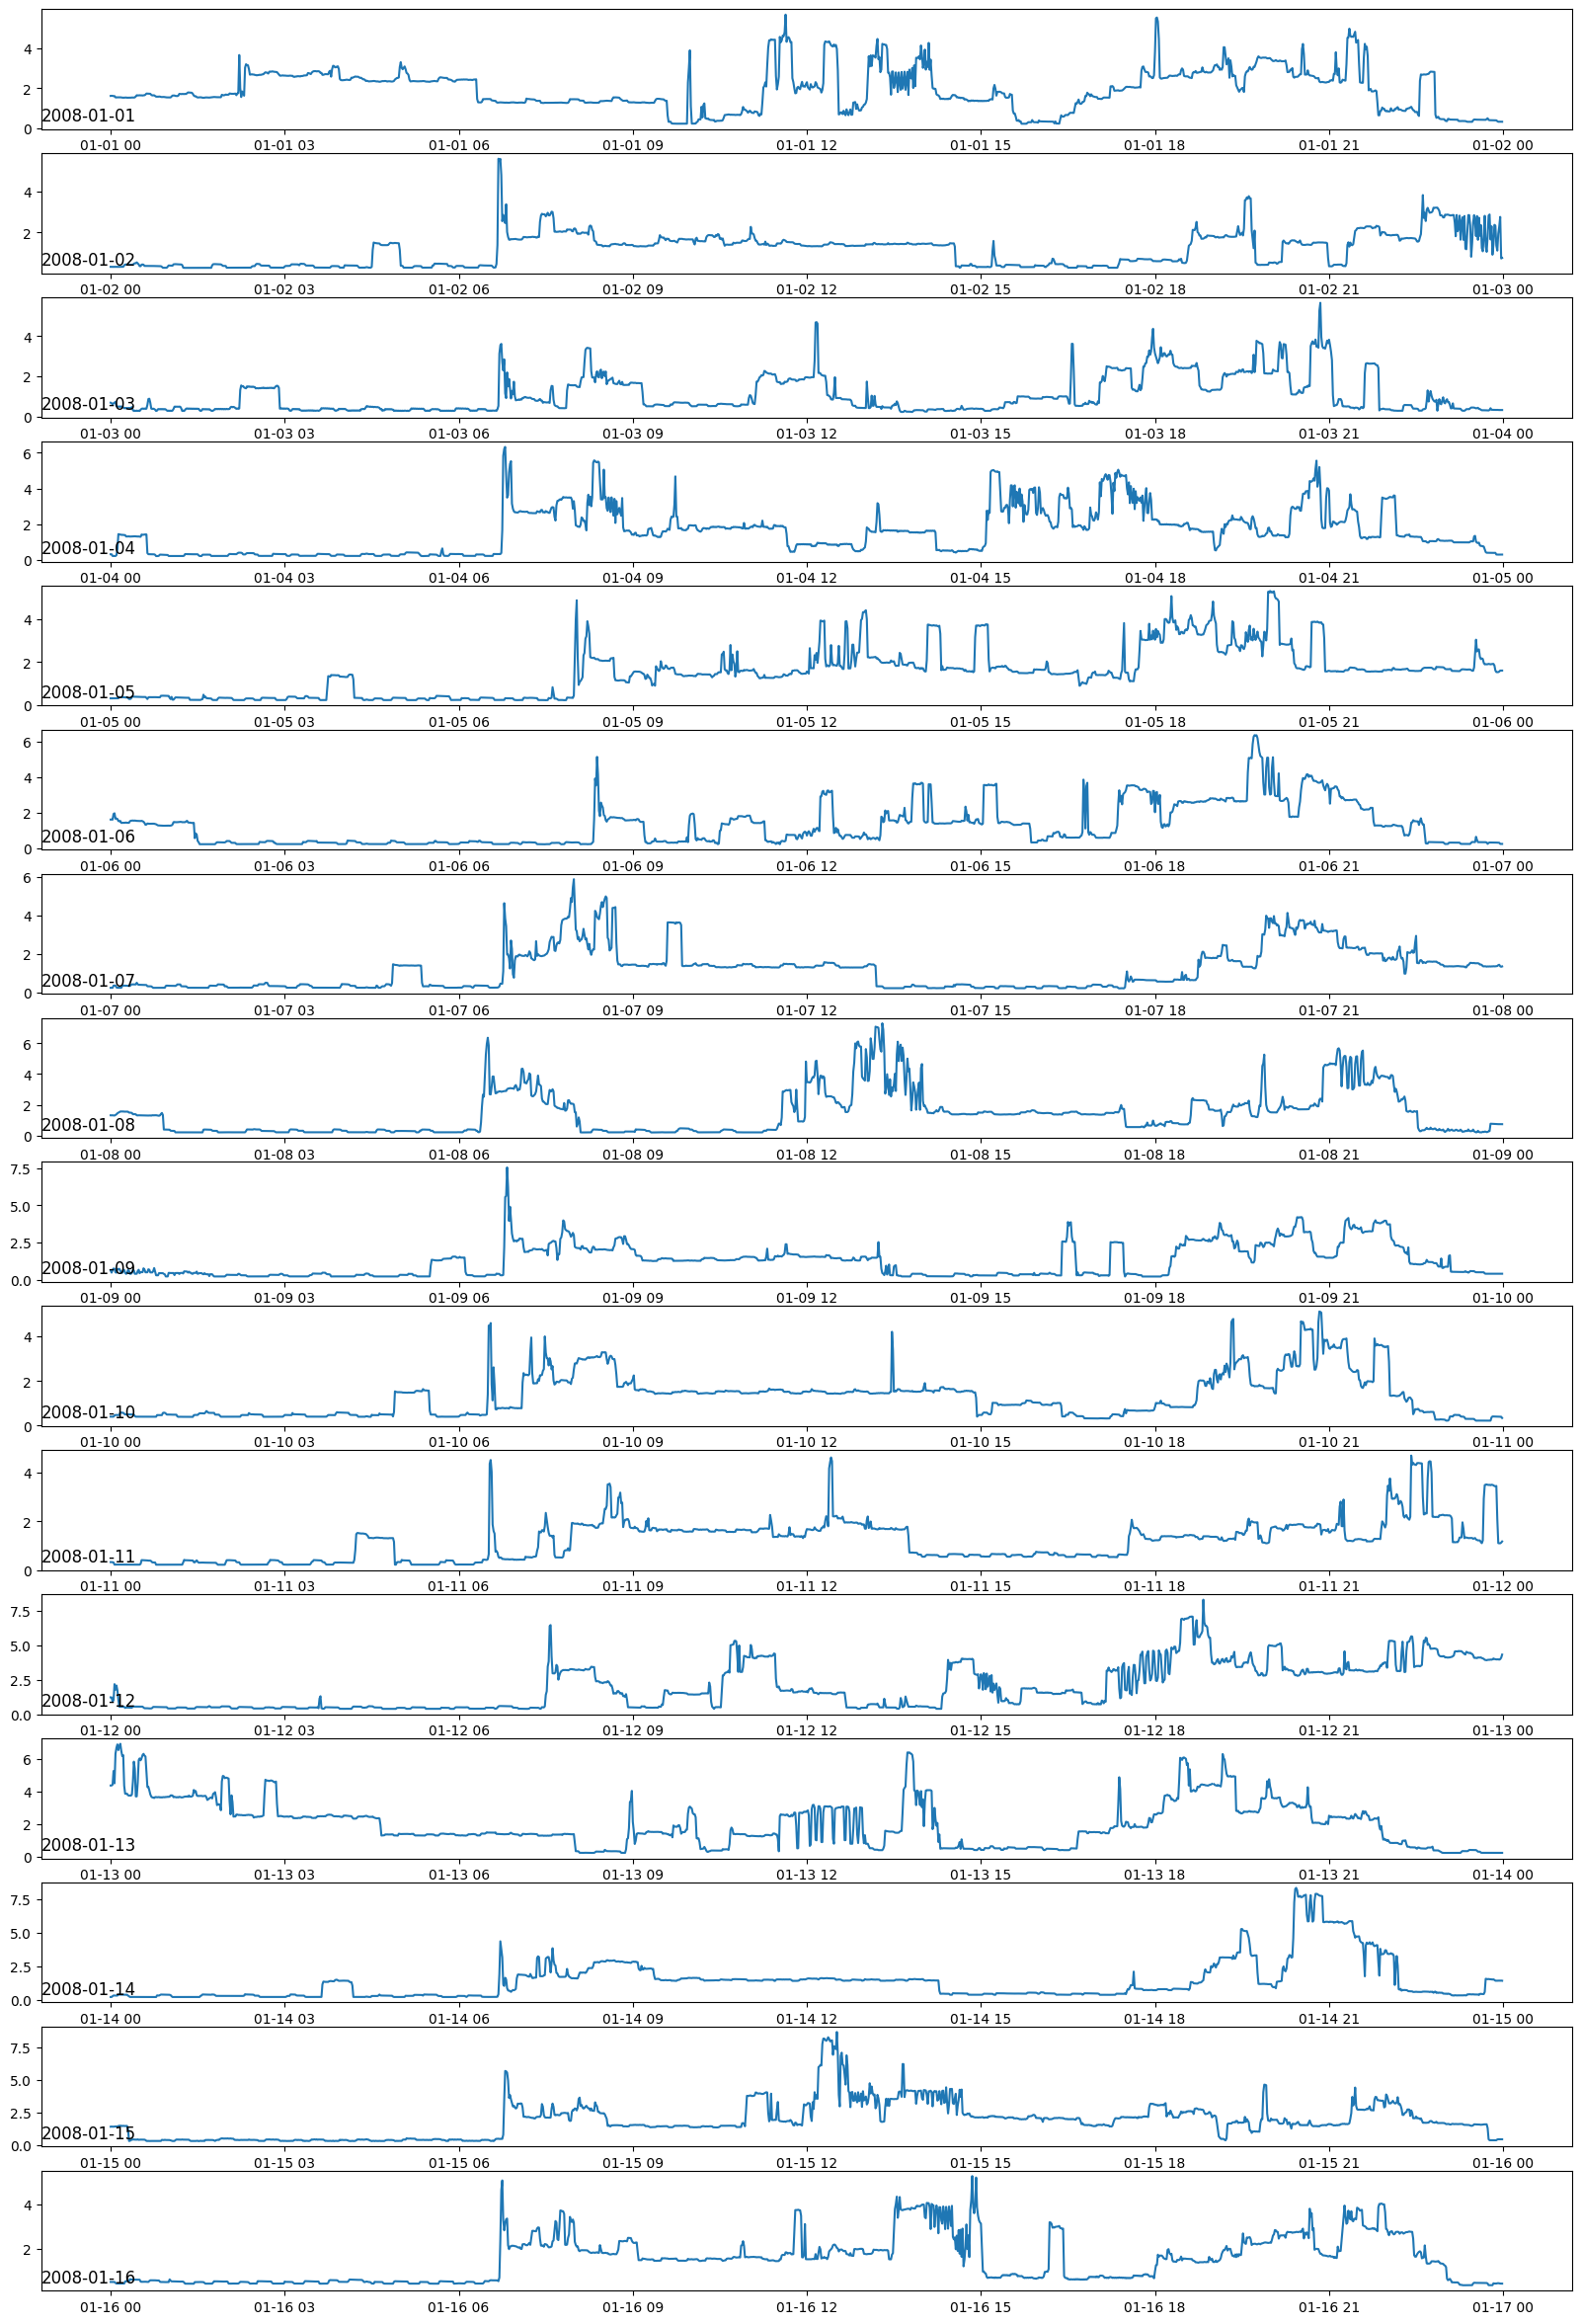

In [44]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract the year, month, and day from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Dataset
dataset = df

# Define the year, month, and days to plot
year = 2008
month = 1  # January
days = [x for x in range(1, 17)]

# Create the plot figure
pyplot.figure(figsize=(20, 30))

for i in range(len(days)):
    # Prepare subplot
    ax = pyplot.subplot(len(days), 1, i + 1)
    
    # Get all observations for the year, month, and day
    day = days[i]
    result = dataset[(dataset['Year'] == year) & (dataset['Month'] == month) & (dataset['Day'] == day)]
    
    # Plot the active power for the day
    pyplot.plot(result['Global_active_power'])
    
    # Add a title to the subplot
    pyplot.title(f'{year}-{month:02d}-{day:02d}', y=0, loc='left')

# Display the plot
pyplot.show()


According to the observation of these graphs we can divide the behavior of the tenants to 4 main phases: The first phase [22h - 06h]: We notice the decrease of the electricity consumption during this period which leads us to deduce that the inhabitants are asleep. The second phase [06h - 10h]: We notice the increase of the consumption of electricity of electricity, it means the beginning of the household activities. The third phase [10am - 6pm]: We notice the decrease of electricity consumption, which is logical, some household activities that use electricity are finished, and some people leave the house. The fourth phase [18h - 22h]: We notice again the increase of electricity consumption due to the return of of electricity due to the return of the inhabitants to their homes, and since it is night, there is the illumination of the bulbs, the television etc. but apart from that there are exceptions like the weekend days (Sunday 13-01- 2008) where the electricity consumption has increased all the time.